<a href="https://colab.research.google.com/github/shahab-f/EAI6010-Applications_of_Artificial_Intelligence-Winter_2023/blob/main/EAI6010_ShahabaddinFeghahati_Week1_Winter_2023_rev_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAI6010 - Module 1: Intro to AI Applications


# Introduction

The code beneath retrieves historical price data for Litecoin on Bitstamp using the Cryptowatch API, creates a line plot of the closing prices using Pandas, creates an interactive version of the plot using Bokeh, and writes the data to an Excel file using Pandas. The resulting plot and Excel file can be used for further analysis and visualization.

# Body/Analysis

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [ ]:
import requests
import pandas as pd

def get_historic_price(symbol, exchange='Bitstamp', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

# Example usage
#ltc_data = get_historic_price('ltc')
#print(ltc_data.head())


I will now pull data from Litecoin, the most popular cryptocurrencies, for the last 100 days:

In [ ]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2022-11-17 03:18:47.933076')

In [ ]:
ltc = get_historic_price('ltc', 'bitstamp', after=last_100days)

ltc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-25 00:00:00,90.97,91.63,90.97,91.62,1262.967328,115109.277518
2023-02-25 01:00:00,91.71,91.71,91.47,91.60,190.456741,17441.560723
2023-02-25 02:00:00,91.55,91.95,91.55,91.86,256.025116,23512.531975
2023-02-25 03:00:00,91.98,91.98,91.15,91.28,220.103567,20126.164892
2023-02-25 04:00:00,91.23,91.44,91.23,91.44,3.418822,312.173244


### Note

Bitfinex is an alternative to Bitstamp for buying, selling, and trading cryptocurrencies. Bitstamp primarily serves European customers, while Bitfinex serves a global customer base. Bitfinex offers a wider range of cryptocurrencies, including Dogecoin and Uniswap, while Bitstamp offers trading pairs for Bitcoin, Ethereum, Ripple, Litecoin, and others. Trading fees and volume also differ between the two exchanges (Bitfinex, 2023; Bitstamp, 2022).

### Let's plot it:

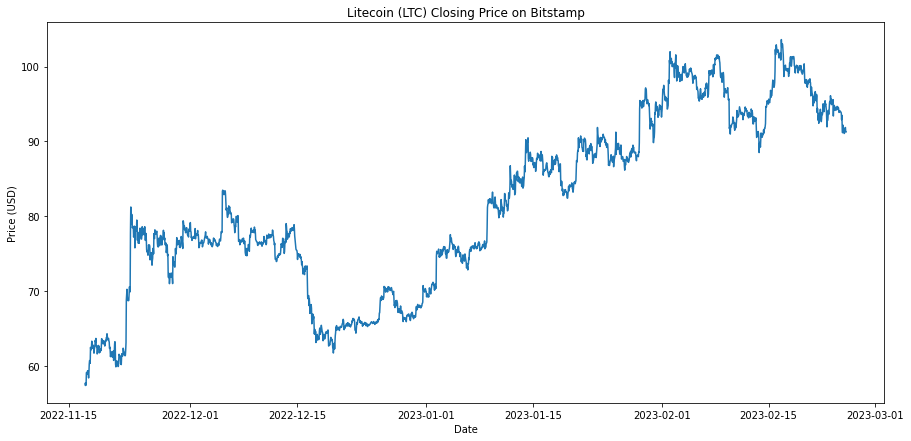

In [ ]:
import matplotlib.pyplot as plt

#ltc['ClosePrice'].plot(figsize=(15, 7))
plt.figure(figsize=(15, 7))
plt.plot(ltc.index, ltc['ClosePrice'])
plt.title('Litecoin (LTC) Closing Price on Bitstamp')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

### Dynamic plots with Bokeh

May need to `pip install bokeh`

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p1 = figure(x_axis_type="datetime", title="Litecoin (LTC) Closing Price on Bitstamp",
            x_axis_label='Date', y_axis_label='Price (USD)')

p1.plot_height = 400
p1.grid.grid_line_alpha = 0.3

p1.line(ltc.index, ltc['ClosePrice'], color='#f2a900', legend_label='Litecoin')

p1.legend.location = "top_left"

show(p1)


### Observation

The plot displays the price fluctuations of Litecoin on the Bitstamp exchange spanning from November 17th, 2022, to February 24th, 2023, presenting a comprehensive view of its performance during this period. The line chart shows the daily closing prices of Litecoin (LTC) over a period of three months. The chart indicates that the price of LTC was relatively stable between mid-November and early December before experiencing significant fluctuations in late December and early January. The price peaked in early February before declining towards the end of the month. Traders and investors can use this plot to identify trends and patterns in the price of Litecoin on Bitstamp and make informed trading decisions based on this information.

### Exporting to Excel

In [ ]:
writer = pd.ExcelWriter('Litecoin_history.xlsx')
ltc.to_excel(writer, sheet_name='Litecoin')
writer.save()

# Conclusion

Using the Pandas and Bokeh libraries, this assignment shows how to work with cryptocurrency price data in Python.

We first used the requests library to retrieve historical price data for Litecoin (LTC) from the Cryptowatch API. We then used Pandas to convert the JSON data into a DataFrame, and plotted the closing prices of LTC over time using both Pandas and Bokeh. Finally, we wrote the LTC price data to an Excel file using Pandas.

These steps illustrate how Python can be used to collect, analyze, and visualize cryptocurrency price data. The resulting plots and data can be useful for analyzing trends and identifying potential trading or investment opportunities in the cryptocurrency market.

It is worth noting that the example code above uses a single cryptocurrency (Litecoin) and a single exchange (Bitstamp). However, the same techniques can be applied to other cryptocurrencies and exchanges by adjusting the API endpoints and parameters accordingly. Additionally, the code can be further extended and customized to fit specific needs or requirements.


# References

- _Assignment_Week_1._ (n.d.). https://northeastern.instructure.com/courses/131480/assignments/1763695
- TensorFlow. (2021, December 14). _Google Colab features you may have missed_ [Video]. YouTube. https://www.youtube.com/watch?v=rNgswRZ2C1Y
- Wikimedia Foundation. (2022, December 28). Bitstamp. Wikipedia. Retrieved February 23, 2023, from https://en.wikipedia.org/wiki/Bitstamp 
- Wikimedia Foundation. (2023, February 7). Bitfinex. Wikipedia. Retrieved February 23, 2023, from https://en.wikipedia.org/wiki/Bitfinex 